<a href="https://colab.research.google.com/github/ebokoh/travel_experience_analysis/blob/main/travel_experience_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install imblearn

In [ ]:
#import libraries
import os
#import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings 
filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV

# Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,roc_curve, roc_auc_score,accuracy_score

In [ ]:

os.chdir('D:\DataScience\GreatLearningMIT\hackathon')

In [ ]:
#Read all csv files
df_Traveldata_train = pd.read_csv('TrainData\Traveldata_train.csv')
df_Surveydata_train = pd.read_csv('TrainData\Surveydata_train.csv')

In [ ]:
df_Traveldata_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
df_Surveydata_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
# shape of traveldata train
df_Traveldata_train.shape

(94379, 9)

In [ ]:
# shape of surveydata train
df_Surveydata_train.shape

(94379, 17)

In [ ]:
df_Traveldata_train.duplicated().sum()

0

In [ ]:
df_Surveydata_train.duplicated().sum()

0

In [ ]:
df_train = pd.merge(df_Traveldata_train, df_Surveydata_train, on='ID', how='outer')

In [ ]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_train.shape

(94379, 25)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
df_train.describe(include=[object]).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835


In [ ]:
df_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
df_train_num = df_train.select_dtypes(['float64','int64'])
df_train_cat = df_train.select_dtypes(['object'])

In [ ]:
df_train_num.isnull().sum().sort_values(ascending=False)

Arrival_Delay_in_Mins      357
Departure_Delay_in_Mins     57
Age                         33
ID                           0
Travel_Distance              0
Overall_Experience           0
dtype: int64

In [ ]:
df_train_cat.isnull().sum().sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Baggage_Handling            142
Online_Support               91
Legroom                      90
Gender                       77
CheckIn_Service              77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Onboard_Wifi_Service         30
Platform_Location            30
Onboard_Entertainment        18
Cleanliness                   6
Online_Boarding               6
Seat_Class                    0
Travel_Class                  0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
imr = imputer.fit(df_train_num)
df_train_num = pd.DataFrame(imr.transform(df_train_num), columns=df_train_num.columns)

In [ ]:
df_train_num.isnull().sum()

ID                         0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
dtype: int64

In [ ]:
df_train_cat = df_train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df_train_cat.isnull().sum()

Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
df_train_num.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
0,98800001.0,52.0,272.0,0.0,5.0,0.0
1,98800002.0,48.0,2200.0,9.0,0.0,0.0
2,98800003.0,43.0,1061.0,77.0,119.0,1.0
3,98800004.0,44.0,780.0,13.0,18.0,0.0
4,98800005.0,50.0,1981.0,0.0,0.0,1.0


In [ ]:
df_train_cat.head()

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,Business Travel,Business,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,Male,Loyal Customer,Personal Travel,Eco,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,Female,Loyal Customer,Business Travel,Business,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,Female,Loyal Customer,Business Travel,Business,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,Female,Loyal Customer,Business Travel,Business,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
from scipy.stats import zscore
df_train_num_norm=df_train_num[['Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']].apply(zscore)

In [ ]:
df_train_num_norm.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0.832356,-1.660469,-0.383916,-0.259227
1,0.567699,0.215099,-0.147874,-0.389511
2,0.236878,-0.892926,1.635557,2.711265
3,0.303042,-1.166284,-0.042966,0.079514
4,0.700027,0.002054,-0.383916,-0.389511


In [ ]:
df_train_main = pd.concat([df_train_num['Overall_Experience'],df_train_num_norm, df_train_cat], axis = 1, join = 'inner')

In [ ]:
df_train_main.head()

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0.0,0.832356,-1.660469,-0.383916,-0.259227,Female,Loyal Customer,Business Travel,Business,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,0.0,0.567699,0.215099,-0.147874,-0.389511,Male,Loyal Customer,Personal Travel,Eco,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,1.0,0.236878,-0.892926,1.635557,2.711265,Female,Loyal Customer,Business Travel,Business,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,0.0,0.303042,-1.166284,-0.042966,0.079514,Female,Loyal Customer,Business Travel,Business,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,1.0,0.700027,0.002054,-0.383916,-0.389511,Female,Loyal Customer,Business Travel,Business,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_train_main.shape

(94379, 24)

In [ ]:
df_train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  float64
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   Departure_Delay_in_Mins  94379 non-null  float64
 4   Arrival_Delay_in_Mins    94379 non-null  float64
 5   Gender                   94379 non-null  object 
 6   Customer_Type            94379 non-null  object 
 7   Type_Travel              94379 non-null  object 
 8   Travel_Class             94379 non-null  object 
 9   Seat_Comfort             94379 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  94379 non-null  object 
 12  Catering                 94379 non-null  object 
 13  Platform_Location        94379 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_train_main['Overall_Experience'] = df_train['Overall_Experience'].astype('int64')

In [ ]:
df_train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   Departure_Delay_in_Mins  94379 non-null  float64
 4   Arrival_Delay_in_Mins    94379 non-null  float64
 5   Gender                   94379 non-null  object 
 6   Customer_Type            94379 non-null  object 
 7   Type_Travel              94379 non-null  object 
 8   Travel_Class             94379 non-null  object 
 9   Seat_Comfort             94379 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  94379 non-null  object 
 12  Catering                 94379 non-null  object 
 13  Platform_Location        94379 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_train_main.head()

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0,0.832356,-1.660469,-0.383916,-0.259227,Female,Loyal Customer,Business Travel,Business,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,0,0.567699,0.215099,-0.147874,-0.389511,Male,Loyal Customer,Personal Travel,Eco,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,1,0.236878,-0.892926,1.635557,2.711265,Female,Loyal Customer,Business Travel,Business,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,0,0.303042,-1.166284,-0.042966,0.079514,Female,Loyal Customer,Business Travel,Business,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,1,0.700027,0.002054,-0.383916,-0.389511,Female,Loyal Customer,Business Travel,Business,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_train_main['Gender'].value_counts()

Female    47892
Male      46487
Name: Gender, dtype: int64

In [ ]:
df_train_main['Gender'] = np.where(df_train_main['Gender'] == 'Female', '0',df_train_main['Gender'])
df_train_main['Gender'] = np.where(df_train_main['Gender'] == 'Male', '1',df_train_main['Gender'])

In [ ]:
df_train_main['Customer_Type'].value_counts()

Loyal Customer       78774
Disloyal Customer    15605
Name: Customer_Type, dtype: int64

In [ ]:
df_train_main['Customer_Type'] = np.where(df_train_main['Customer_Type'] == 'Disloyal Customer', '0',df_train_main['Customer_Type'])
df_train_main['Customer_Type'] = np.where(df_train_main['Customer_Type'] == 'Loyal Customer', '1',df_train_main['Customer_Type'])

In [ ]:
df_train_main.head()

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0,0.832356,-1.660469,-0.383916,-0.259227,0,1,Business Travel,Business,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,0,0.567699,0.215099,-0.147874,-0.389511,1,1,Personal Travel,Eco,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,1,0.236878,-0.892926,1.635557,2.711265,0,1,Business Travel,Business,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,0,0.303042,-1.166284,-0.042966,0.079514,0,1,Business Travel,Business,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,1,0.700027,0.002054,-0.383916,-0.389511,0,1,Business Travel,Business,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   Departure_Delay_in_Mins  94379 non-null  float64
 4   Arrival_Delay_in_Mins    94379 non-null  float64
 5   Gender                   94379 non-null  object 
 6   Customer_Type            94379 non-null  object 
 7   Type_Travel              94379 non-null  object 
 8   Travel_Class             94379 non-null  object 
 9   Seat_Comfort             94379 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  94379 non-null  object 
 12  Catering                 94379 non-null  object 
 13  Platform_Location        94379 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_train_main['Type_Travel'].value_counts()

Business Travel    67843
Personal Travel    26536
Name: Type_Travel, dtype: int64

In [ ]:
df_train_main['Type_Travel'] = np.where(df_train_main['Type_Travel'] == 'Personal Travel', '0',df_train_main['Type_Travel'])
df_train_main['Type_Travel'] = np.where(df_train_main['Type_Travel'] == 'Business Travel', '1',df_train_main['Type_Travel'])

In [ ]:
df_train_main['Travel_Class'].value_counts()

Eco         49342
Business    45037
Name: Travel_Class, dtype: int64

In [ ]:
df_train_main['Travel_Class'] = np.where(df_train_main['Travel_Class'] == 'Eco', '0',df_train_main['Travel_Class'])
df_train_main['Travel_Class'] = np.where(df_train_main['Travel_Class'] == 'Business', '1',df_train_main['Travel_Class'])

In [ ]:
df_train_main['Seat_Comfort'].value_counts()

Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64

In [ ]:
df_train_main['Seat_Comfort'] = np.where(df_train_main['Seat_Comfort'] == 'Extremely Poor', '0',df_train_main['Seat_Comfort'])
df_train_main['Seat_Comfort'] = np.where(df_train_main['Seat_Comfort'] == 'Poor', '1',df_train_main['Seat_Comfort'])
df_train_main['Seat_Comfort'] = np.where(df_train_main['Seat_Comfort'] == 'Needs Improvement', '2',df_train_main['Seat_Comfort'])
df_train_main['Seat_Comfort'] = np.where(df_train_main['Seat_Comfort'] == 'Acceptable', '3',df_train_main['Seat_Comfort'])
df_train_main['Seat_Comfort'] = np.where(df_train_main['Seat_Comfort'] == 'Good', '4',df_train_main['Seat_Comfort'])
df_train_main['Seat_Comfort'] = np.where(df_train_main['Seat_Comfort'] == 'Excellent', '5',df_train_main['Seat_Comfort'])

In [ ]:
df_train_main['Seat_Class'].value_counts()

Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64

In [ ]:
df_train_main['Seat_Class'] = np.where(df_train_main['Seat_Class'] == 'Ordinary', '0',df_train_main['Seat_Class'])
df_train_main['Seat_Class'] = np.where(df_train_main['Seat_Class'] == 'Green Car', '1',df_train_main['Seat_Class'])

In [ ]:
df_train_main['Arrival_Time_Convenient'].value_counts()

Good                 28504
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64

In [ ]:
df_train_main['Arrival_Time_Convenient'] = np.where(df_train_main['Arrival_Time_Convenient'] == 'Extremely Poor', '0',df_train_main['Arrival_Time_Convenient'])
df_train_main['Arrival_Time_Convenient'] = np.where(df_train_main['Arrival_Time_Convenient'] == 'Poor', '1',df_train_main['Arrival_Time_Convenient'])
df_train_main['Arrival_Time_Convenient'] = np.where(df_train_main['Arrival_Time_Convenient'] == 'Needs Improvement', '2',df_train_main['Arrival_Time_Convenient'])
df_train_main['Arrival_Time_Convenient'] = np.where(df_train_main['Arrival_Time_Convenient'] == 'Acceptable', '3',df_train_main['Arrival_Time_Convenient'])
df_train_main['Arrival_Time_Convenient'] = np.where(df_train_main['Arrival_Time_Convenient'] == 'Good', '4',df_train_main['Arrival_Time_Convenient'])
df_train_main['Arrival_Time_Convenient'] = np.where(df_train_main['Arrival_Time_Convenient'] == 'Excellent', '5',df_train_main['Arrival_Time_Convenient'])

In [ ]:
df_train_main['Catering'].value_counts()

Acceptable           27209
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64

In [ ]:
df_train_main['Catering'] = np.where(df_train_main['Catering'] == 'Extremely Poor', '0',df_train_main['Catering'])
df_train_main['Catering'] = np.where(df_train_main['Catering'] == 'Poor', '1',df_train_main['Catering'])
df_train_main['Catering'] = np.where(df_train_main['Catering'] == 'Needs Improvement', '2',df_train_main['Catering'])
df_train_main['Catering'] = np.where(df_train_main['Catering'] == 'Acceptable', '3',df_train_main['Catering'])
df_train_main['Catering'] = np.where(df_train_main['Catering'] == 'Good', '4',df_train_main['Catering'])
df_train_main['Catering'] = np.where(df_train_main['Catering'] == 'Excellent', '5',df_train_main['Catering'])

In [ ]:
df_train_main['Platform_Location'].value_counts()

Manageable           24203
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981
Very Inconvenient        2
Name: Platform_Location, dtype: int64

In [ ]:
df_train_main['Platform_Location'] = np.where(df_train_main['Platform_Location'] == 'Very Inconvenient', '0',df_train_main['Platform_Location'])
df_train_main['Platform_Location'] = np.where(df_train_main['Platform_Location'] == 'Inconvenient', '1',df_train_main['Platform_Location'])
df_train_main['Platform_Location'] = np.where(df_train_main['Platform_Location'] == 'Needs Improvement', '2',df_train_main['Platform_Location'])
df_train_main['Platform_Location'] = np.where(df_train_main['Platform_Location'] == 'Manageable', '3',df_train_main['Platform_Location'])
df_train_main['Platform_Location'] = np.where(df_train_main['Platform_Location'] == 'Convenient', '4',df_train_main['Platform_Location'])
df_train_main['Platform_Location'] = np.where(df_train_main['Platform_Location'] == 'Very Convenient', '5',df_train_main['Platform_Location'])

In [ ]:
df_train_main['Onboard_Wifi_Service'].value_counts()

Good                 22865
Excellent            20968
Acceptable           20118
Needs Improvement    19596
Poor                 10741
Extremely Poor          91
Name: Onboard_Wifi_Service, dtype: int64

In [ ]:
df_train_main['Onboard_Wifi_Service'] = np.where(df_train_main['Onboard_Wifi_Service'] == 'Extremely Poor', '0',df_train_main['Onboard_Wifi_Service'])
df_train_main['Onboard_Wifi_Service'] = np.where(df_train_main['Onboard_Wifi_Service'] == 'Poor', '1',df_train_main['Onboard_Wifi_Service'])
df_train_main['Onboard_Wifi_Service'] = np.where(df_train_main['Onboard_Wifi_Service'] == 'Needs Improvement', '2',df_train_main['Onboard_Wifi_Service'])
df_train_main['Onboard_Wifi_Service'] = np.where(df_train_main['Onboard_Wifi_Service'] == 'Acceptable', '3',df_train_main['Onboard_Wifi_Service'])
df_train_main['Onboard_Wifi_Service'] = np.where(df_train_main['Onboard_Wifi_Service'] == 'Good', '4',df_train_main['Onboard_Wifi_Service'])
df_train_main['Onboard_Wifi_Service'] = np.where(df_train_main['Onboard_Wifi_Service'] == 'Excellent', '5',df_train_main['Onboard_Wifi_Service'])

In [ ]:
df_train_main['Onboard_Entertainment'].value_counts()

Good                 30464
Excellent            21644
Acceptable           17560
Needs Improvement    13926
Poor                  8641
Extremely Poor        2144
Name: Onboard_Entertainment, dtype: int64

In [ ]:
df_train_main['Onboard_Entertainment'] = np.where(df_train_main['Onboard_Entertainment'] == 'Extremely Poor', '0',df_train_main['Onboard_Entertainment'])
df_train_main['Onboard_Entertainment'] = np.where(df_train_main['Onboard_Entertainment'] == 'Poor', '1',df_train_main['Onboard_Entertainment'])
df_train_main['Onboard_Entertainment'] = np.where(df_train_main['Onboard_Entertainment'] == 'Needs Improvement', '2',df_train_main['Onboard_Entertainment'])
df_train_main['Onboard_Entertainment'] = np.where(df_train_main['Onboard_Entertainment'] == 'Acceptable', '3',df_train_main['Onboard_Entertainment'])
df_train_main['Onboard_Entertainment'] = np.where(df_train_main['Onboard_Entertainment'] == 'Good', '4',df_train_main['Onboard_Entertainment'])
df_train_main['Onboard_Entertainment'] = np.where(df_train_main['Onboard_Entertainment'] == 'Excellent', '5',df_train_main['Onboard_Entertainment'])

In [ ]:
df_train_main['Online_Support'].value_counts()

Good                 30107
Excellent            25894
Acceptable           15702
Needs Improvement    12508
Poor                 10167
Extremely Poor           1
Name: Online_Support, dtype: int64

In [ ]:
df_train_main['Online_Support'] = np.where(df_train_main['Online_Support'] == 'Extremely Poor', '0',df_train_main['Online_Support'])
df_train_main['Online_Support'] = np.where(df_train_main['Online_Support'] == 'Poor', '1',df_train_main['Online_Support'])
df_train_main['Online_Support'] = np.where(df_train_main['Online_Support'] == 'Needs Improvement', '2',df_train_main['Online_Support'])
df_train_main['Online_Support'] = np.where(df_train_main['Online_Support'] == 'Acceptable', '3',df_train_main['Online_Support'])
df_train_main['Online_Support'] = np.where(df_train_main['Online_Support'] == 'Good', '4',df_train_main['Online_Support'])
df_train_main['Online_Support'] = np.where(df_train_main['Online_Support'] == 'Excellent', '5',df_train_main['Online_Support'])

In [ ]:
df_train_main['Ease_of_Online_Booking'].value_counts()

Good                 28982
Excellent            24744
Acceptable           16390
Needs Improvement    14479
Poor                  9768
Extremely Poor          16
Name: Ease_of_Online_Booking, dtype: int64

In [ ]:
df_train_main['Ease_of_Online_Booking'] = np.where(df_train_main['Ease_of_Online_Booking'] == 'Extremely Poor', '0',df_train_main['Ease_of_Online_Booking'])
df_train_main['Ease_of_Online_Booking'] = np.where(df_train_main['Ease_of_Online_Booking'] == 'Poor', '1',df_train_main['Ease_of_Online_Booking'])
df_train_main['Ease_of_Online_Booking'] = np.where(df_train_main['Ease_of_Online_Booking'] == 'Needs Improvement', '2',df_train_main['Ease_of_Online_Booking'])
df_train_main['Ease_of_Online_Booking'] = np.where(df_train_main['Ease_of_Online_Booking'] == 'Acceptable', '3',df_train_main['Ease_of_Online_Booking'])
df_train_main['Ease_of_Online_Booking'] = np.where(df_train_main['Ease_of_Online_Booking'] == 'Good', '4',df_train_main['Ease_of_Online_Booking'])
df_train_main['Ease_of_Online_Booking'] = np.where(df_train_main['Ease_of_Online_Booking'] == 'Excellent', '5',df_train_main['Ease_of_Online_Booking'])

In [ ]:
df_train_main['Onboard_Service'].value_counts()

Good                 34866
Excellent            21272
Acceptable           18071
Needs Improvement    11390
Poor                  8776
Extremely Poor           4
Name: Onboard_Service, dtype: int64

In [ ]:
df_train_main['Onboard_Service'] = np.where(df_train_main['Onboard_Service'] == 'Extremely Poor', '0',df_train_main['Onboard_Service'])
df_train_main['Onboard_Service'] = np.where(df_train_main['Onboard_Service'] == 'Poor', '1',df_train_main['Onboard_Service'])
df_train_main['Onboard_Service'] = np.where(df_train_main['Onboard_Service'] == 'Needs Improvement', '2',df_train_main['Onboard_Service'])
df_train_main['Onboard_Service'] = np.where(df_train_main['Onboard_Service'] == 'Acceptable', '3',df_train_main['Onboard_Service'])
df_train_main['Onboard_Service'] = np.where(df_train_main['Onboard_Service'] == 'Good', '4',df_train_main['Onboard_Service'])
df_train_main['Onboard_Service'] = np.where(df_train_main['Onboard_Service'] == 'Excellent', '5',df_train_main['Onboard_Service'])

In [ ]:
df_train_main['Legroom'].value_counts()

Good                 28960
Excellent            24832
Acceptable           16384
Needs Improvement    15753
Poor                  8110
Extremely Poor         340
Name: Legroom, dtype: int64

In [ ]:
df_train_main['Legroom'] = np.where(df_train_main['Legroom'] == 'Extremely Poor', '0',df_train_main['Legroom'])
df_train_main['Legroom'] = np.where(df_train_main['Legroom'] == 'Poor', '1',df_train_main['Legroom'])
df_train_main['Legroom'] = np.where(df_train_main['Legroom'] == 'Needs Improvement', '2',df_train_main['Legroom'])
df_train_main['Legroom'] = np.where(df_train_main['Legroom'] == 'Acceptable', '3',df_train_main['Legroom'])
df_train_main['Legroom'] = np.where(df_train_main['Legroom'] == 'Good', '4',df_train_main['Legroom'])
df_train_main['Legroom'] = np.where(df_train_main['Legroom'] == 'Excellent', '5',df_train_main['Legroom'])

In [ ]:
df_train_main['Baggage_Handling'].value_counts()

Good                 35086
Excellent            26003
Acceptable           17767
Needs Improvement     9759
Poor                  5764
Name: Baggage_Handling, dtype: int64

In [ ]:
df_train_main['Baggage_Handling'] = np.where(df_train_main['Baggage_Handling'] == 'Extremely Poor', '0',df_train_main['Baggage_Handling'])
df_train_main['Baggage_Handling'] = np.where(df_train_main['Baggage_Handling'] == 'Poor', '1',df_train_main['Baggage_Handling'])
df_train_main['Baggage_Handling'] = np.where(df_train_main['Baggage_Handling'] == 'Needs Improvement', '2',df_train_main['Baggage_Handling'])
df_train_main['Baggage_Handling'] = np.where(df_train_main['Baggage_Handling'] == 'Acceptable', '3',df_train_main['Baggage_Handling'])
df_train_main['Baggage_Handling'] = np.where(df_train_main['Baggage_Handling'] == 'Good', '4',df_train_main['Baggage_Handling'])
df_train_main['Baggage_Handling'] = np.where(df_train_main['Baggage_Handling'] == 'Excellent', '5',df_train_main['Baggage_Handling'])

In [ ]:
df_train_main['CheckIn_Service'].value_counts()

Good                 26579
Acceptable           25803
Excellent            19641
Needs Improvement    11218
Poor                 11137
Extremely Poor           1
Name: CheckIn_Service, dtype: int64

In [ ]:
df_train_main['CheckIn_Service'] = np.where(df_train_main['CheckIn_Service'] == 'Extremely Poor', '0',df_train_main['CheckIn_Service'])
df_train_main['CheckIn_Service'] = np.where(df_train_main['CheckIn_Service'] == 'Poor', '1',df_train_main['CheckIn_Service'])
df_train_main['CheckIn_Service'] = np.where(df_train_main['CheckIn_Service'] == 'Needs Improvement', '2',df_train_main['CheckIn_Service'])
df_train_main['CheckIn_Service'] = np.where(df_train_main['CheckIn_Service'] == 'Acceptable', '3',df_train_main['CheckIn_Service'])
df_train_main['CheckIn_Service'] = np.where(df_train_main['CheckIn_Service'] == 'Good', '4',df_train_main['CheckIn_Service'])
df_train_main['CheckIn_Service'] = np.where(df_train_main['CheckIn_Service'] == 'Excellent', '5',df_train_main['CheckIn_Service'])

In [ ]:
df_train_main['Cleanliness'].value_counts()

Good                 35433
Excellent            26053
Acceptable           17449
Needs Improvement     9806
Poor                  5633
Extremely Poor           5
Name: Cleanliness, dtype: int64

In [ ]:
df_train_main['Cleanliness'] = np.where(df_train_main['Cleanliness'] == 'Extremely Poor', '0',df_train_main['Cleanliness'])
df_train_main['Cleanliness'] = np.where(df_train_main['Cleanliness'] == 'Poor', '1',df_train_main['Cleanliness'])
df_train_main['Cleanliness'] = np.where(df_train_main['Cleanliness'] == 'Needs Improvement', '2',df_train_main['Cleanliness'])
df_train_main['Cleanliness'] = np.where(df_train_main['Cleanliness'] == 'Acceptable', '3',df_train_main['Cleanliness'])
df_train_main['Cleanliness'] = np.where(df_train_main['Cleanliness'] == 'Good', '4',df_train_main['Cleanliness'])
df_train_main['Cleanliness'] = np.where(df_train_main['Cleanliness'] == 'Excellent', '5',df_train_main['Cleanliness'])

In [ ]:
df_train_main['Online_Boarding'].value_counts()

Good                 25539
Acceptable           22475
Excellent            21742
Needs Improvement    13451
Poor                 11160
Extremely Poor          12
Name: Online_Boarding, dtype: int64

In [ ]:
df_train_main['Online_Boarding'] = np.where(df_train_main['Online_Boarding'] == 'Extremely Poor', '0',df_train_main['Online_Boarding'])
df_train_main['Online_Boarding'] = np.where(df_train_main['Online_Boarding'] == 'Poor', '1',df_train_main['Online_Boarding'])
df_train_main['Online_Boarding'] = np.where(df_train_main['Online_Boarding'] == 'Needs Improvement', '2',df_train_main['Online_Boarding'])
df_train_main['Online_Boarding'] = np.where(df_train_main['Online_Boarding'] == 'Acceptable', '3',df_train_main['Online_Boarding'])
df_train_main['Online_Boarding'] = np.where(df_train_main['Online_Boarding'] == 'Good', '4',df_train_main['Online_Boarding'])
df_train_main['Online_Boarding'] = np.where(df_train_main['Online_Boarding'] == 'Excellent', '5',df_train_main['Online_Boarding'])

In [ ]:
df_train_main.head(20)

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0,0.832356,-1.660469,-0.383916,-0.259227,0,1,1,1,2,...,4,2,3,2,2,3,2,4,2,1
1,0,0.567699,0.215099,-0.147874,-0.389511,1,1,0,0,1,...,4,1,4,4,5,2,1,2,4,4
2,1,0.236878,-0.892926,1.635557,2.711265,0,1,1,1,2,...,2,4,5,5,5,5,5,4,5,5
3,0,0.303042,-1.166284,-0.042966,0.079514,0,1,1,1,3,...,3,2,3,3,3,3,3,4,3,3
4,1,0.700027,0.002054,-0.383916,-0.389511,0,1,1,1,3,...,2,4,5,4,4,4,4,4,4,4
5,1,0.303042,0.808509,-0.383916,-0.389511,1,1,1,1,2,...,4,5,4,3,3,4,3,3,3,3
6,0,1.097012,0.048749,-0.383916,-0.389511,1,1,0,0,4,...,4,4,4,4,4,5,2,5,3,4
7,0,1.692490,-1.095269,-0.383916,-0.311340,1,1,0,1,3,...,5,5,4,4,4,3,4,4,4,5
8,0,-1.152570,-0.333563,-0.357689,-0.389511,1,1,0,0,2,...,3,2,3,3,3,3,2,3,2,3
9,0,1.163177,-1.627393,-0.383916,-0.389511,1,1,1,1,2,...,3,4,4,2,2,2,2,3,2,3


In [ ]:
df_train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   Departure_Delay_in_Mins  94379 non-null  float64
 4   Arrival_Delay_in_Mins    94379 non-null  float64
 5   Gender                   94379 non-null  object 
 6   Customer_Type            94379 non-null  object 
 7   Type_Travel              94379 non-null  object 
 8   Travel_Class             94379 non-null  object 
 9   Seat_Comfort             94379 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  94379 non-null  object 
 12  Catering                 94379 non-null  object 
 13  Platform_Location        94379 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_train_main.isnull().sum()

Overall_Experience         0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
for column in df_train_main.columns:
    if df_train_main[column].dtype == 'object':
        df_train_main[column] = df_train_main[column].astype(np.int64)

In [ ]:
df_train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   Departure_Delay_in_Mins  94379 non-null  float64
 4   Arrival_Delay_in_Mins    94379 non-null  float64
 5   Gender                   94379 non-null  int64  
 6   Customer_Type            94379 non-null  int64  
 7   Type_Travel              94379 non-null  int64  
 8   Travel_Class             94379 non-null  int64  
 9   Seat_Comfort             94379 non-null  int64  
 10  Seat_Class               94379 non-null  int64  
 11  Arrival_Time_Convenient  94379 non-null  int64  
 12  Catering                 94379 non-null  int64  
 13  Platform_Location        94379 non-null  int64  
 14  Onboard_Wifi_Service  

In [ ]:
df_train_main.isnull().sum()

Overall_Experience         0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
df_train_main.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.0,5.466576e-01,0.497821,0.000000,0.000000,1.000000,1.000000,1.000000
Age,94379.0,3.849002e-17,1.000005,-2.145034,-0.821749,0.038385,0.766191,3.015774
Travel_Distance,94379.0,-3.625982e-17,1.000005,-1.876431,-0.603030,-0.054368,0.543907,4.836894
Departure_Delay_in_Mins,94379.0,-3.658434e-17,1.000005,-0.383916,-0.383916,-0.383916,-0.069193,41.369345
Arrival_Delay_in_Mins,94379.0,-8.125124e-16,1.000005,-0.389511,-0.389511,-0.389511,-0.050771,40.884682
Gender,94379.0,4.925566e-01,0.499947,0.000000,0.000000,0.000000,1.000000,1.000000
Customer_Type,94379.0,8.346560e-01,0.371493,0.000000,1.000000,1.000000,1.000000,1.000000
Type_Travel,94379.0,7.188358e-01,0.449570,0.000000,0.000000,1.000000,1.000000,1.000000
Travel_Class,94379.0,4.771930e-01,0.499482,0.000000,0.000000,0.000000,1.000000,1.000000
Seat_Comfort,94379.0,2.839286e+00,1.392082,0.000000,2.000000,3.000000,4.000000,5.000000


# Test Data Set

In [ ]:
#Read all csv files
df_Surveydata_test = pd.read_csv('TestData\\Surveydata_test.csv')
df_Traveldata_test = pd.read_csv('TestData\\Traveldata_test.csv')

In [ ]:
df_Surveydata_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
df_Traveldata_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
df_Surveydata_test.shape

(35602, 16)

In [ ]:
df_Traveldata_test.shape

(35602, 9)

In [ ]:
# merge Surveydata & travel data for Train and testset
df_test_main = pd.merge (df_Traveldata_test, df_Surveydata_test, on = 'ID' , how = 'outer')

In [ ]:
df_test_main.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
df_test_main.shape

(35602, 24)

In [ ]:
df_test_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_test_main.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0


In [ ]:
df_test_main.describe(include = ['object']).T

,count,unique,top,freq
Gender,35572,2,Female,18069
Customer_Type,32219,2,Loyal Customer,26349
Type_Travel,32154,2,Business Travel,22313
Travel_Class,35602,2,Eco,18473
Seat_Comfort,35580,6,Acceptable,8003
Seat_Class,35602,2,Ordinary,17860
Arrival_Time_Convenient,32277,6,Good,7361
Catering,32245,6,Acceptable,7133
Platform_Location,35590,5,Manageable,9364
Onboard_Wifi_Service,35590,6,Good,8743


In [ ]:
df_test_main.duplicated().sum()

0

In [ ]:
df_test_main.isnull().sum().sort_values(ascending=False)

Type_Travel                3448
Customer_Type              3383
Catering                   3357
Arrival_Time_Convenient    3325
Onboard_Service            2872
Arrival_Delay_in_Mins       123
Baggage_Handling             40
Gender                       30
Departure_Delay_in_Mins      29
Online_Support               26
Legroom                      25
CheckIn_Service              22
Seat_Comfort                 22
Ease_of_Online_Booking       18
Platform_Location            12
Onboard_Wifi_Service         12
Age                          11
Onboard_Entertainment         8
Cleanliness                   2
Online_Boarding               2
Seat_Class                    0
Travel_Distance               0
Travel_Class                  0
ID                            0
dtype: int64

In [ ]:
df_test_num = df_test_main.select_dtypes(['float64','int64'])
df_test_cat = df_test_main.select_dtypes(['object'])

In [ ]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
imr = imputer.fit(df_test_num)
df_test_num = pd.DataFrame(imr.transform(df_test_num), columns=df_test_num.columns)

In [ ]:
df_test_num.isnull().sum()

ID                         0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [ ]:
df_test_cat = df_test_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df_test_cat.isnull().sum()

Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
df_test_cat.head()

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,Business Travel,Business,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,Female,Disloyal Customer,Business Travel,Business,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,Male,Loyal Customer,Business Travel,Business,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,Female,Loyal Customer,Personal Travel,Eco,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,Male,Disloyal Customer,Business Travel,Business,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,Good,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
df_test_num.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001.0,36.0,532.0,0.0,0.0
1,99900002.0,21.0,1425.0,9.0,28.0
2,99900003.0,60.0,2832.0,0.0,0.0
3,99900004.0,29.0,1352.0,0.0,0.0
4,99900005.0,18.0,1610.0,17.0,0.0


In [ ]:
df_test_num_norm=df_test_num[['Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']].apply(zscore)

In [ ]:
df_test_num_norm.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,-0.227761,-1.420638,-0.392499,-0.396519
1,-1.218841,-0.548819,-0.154918,0.331234
2,1.357967,0.824810,-0.392499,-0.396519
3,-0.690265,-0.620087,-0.392499,-0.396519
4,-1.417057,-0.368206,0.056265,-0.396519


In [ ]:
df_test_main = pd.concat([df_test_num_norm, df_test_cat], axis = 1, join = 'inner')

In [ ]:

df_test_main.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,-0.227761,-1.420638,-0.392499,-0.396519,Female,Loyal Customer,Business Travel,Business,Acceptable,Green Car,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,-1.218841,-0.548819,-0.154918,0.331234,Female,Disloyal Customer,Business Travel,Business,Extremely Poor,Ordinary,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,1.357967,0.824810,-0.392499,-0.396519,Male,Loyal Customer,Business Travel,Business,Excellent,Ordinary,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,-0.690265,-0.620087,-0.392499,-0.396519,Female,Loyal Customer,Personal Travel,Eco,Acceptable,Green Car,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,-1.417057,-0.368206,0.056265,-0.396519,Male,Disloyal Customer,Business Travel,Business,Excellent,Ordinary,...,Excellent,Excellent,Excellent,Excellent,Good,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
df_test_main.shape

(35602, 23)

In [ ]:
df_test_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35602 non-null  float64
 1   Travel_Distance          35602 non-null  float64
 2   Departure_Delay_in_Mins  35602 non-null  float64
 3   Arrival_Delay_in_Mins    35602 non-null  float64
 4   Gender                   35602 non-null  object 
 5   Customer_Type            35602 non-null  object 
 6   Type_Travel              35602 non-null  object 
 7   Travel_Class             35602 non-null  object 
 8   Seat_Comfort             35602 non-null  object 
 9   Seat_Class               35602 non-null  object 
 10  Arrival_Time_Convenient  35602 non-null  object 
 11  Catering                 35602 non-null  object 
 12  Platform_Location        35602 non-null  object 
 13  Onboard_Wifi_Service     35602 non-null  object 
 14  Onboard_Entertainment 

In [ ]:
df_test_main['Type_Travel'].value_counts()

df_test_main['Type_Travel'] = np.where(df_test_main['Type_Travel'] == 'Personal Travel', '0',df_test_main['Type_Travel'])
df_test_main['Type_Travel'] = np.where(df_test_main['Type_Travel'] == 'Business Travel', '1',df_test_main['Type_Travel'])

In [ ]:
df_test_main['Travel_Class'].value_counts()

df_test_main['Travel_Class'] = np.where(df_test_main['Travel_Class'] == 'Eco', '0',df_test_main['Travel_Class'])
df_test_main['Travel_Class'] = np.where(df_test_main['Travel_Class'] == 'Business', '1',df_test_main['Travel_Class'])

df_test_main['Seat_Comfort'].value_counts()

df_test_main['Seat_Comfort'] = np.where(df_test_main['Seat_Comfort'] == 'Extremely Poor', '0',df_test_main['Seat_Comfort'])
df_test_main['Seat_Comfort'] = np.where(df_test_main['Seat_Comfort'] == 'Poor', '1',df_test_main['Seat_Comfort'])
df_test_main['Seat_Comfort'] = np.where(df_test_main['Seat_Comfort'] == 'Needs Improvement', '2',df_test_main['Seat_Comfort'])
df_test_main['Seat_Comfort'] = np.where(df_test_main['Seat_Comfort'] == 'Acceptable', '3',df_test_main['Seat_Comfort'])
df_test_main['Seat_Comfort'] = np.where(df_test_main['Seat_Comfort'] == 'Good', '4',df_test_main['Seat_Comfort'])
df_test_main['Seat_Comfort'] = np.where(df_test_main['Seat_Comfort'] == 'Excellent', '5',df_test_main['Seat_Comfort'])

df_test_main['Seat_Class'].value_counts()

df_test_main['Seat_Class'] = np.where(df_test_main['Seat_Class'] == 'Ordinary', '0',df_test_main['Seat_Class'])
df_test_main['Seat_Class'] = np.where(df_test_main['Seat_Class'] == 'Green Car', '1',df_test_main['Seat_Class'])

df_test_main['Arrival_Time_Convenient'].value_counts()

df_test_main['Arrival_Time_Convenient'] = np.where(df_test_main['Arrival_Time_Convenient'] == 'Extremely Poor', '0',df_test_main['Arrival_Time_Convenient'])
df_test_main['Arrival_Time_Convenient'] = np.where(df_test_main['Arrival_Time_Convenient'] == 'Poor', '1',df_test_main['Arrival_Time_Convenient'])
df_test_main['Arrival_Time_Convenient'] = np.where(df_test_main['Arrival_Time_Convenient'] == 'Needs Improvement', '2',df_test_main['Arrival_Time_Convenient'])
df_test_main['Arrival_Time_Convenient'] = np.where(df_test_main['Arrival_Time_Convenient'] == 'Acceptable', '3',df_test_main['Arrival_Time_Convenient'])
df_test_main['Arrival_Time_Convenient'] = np.where(df_test_main['Arrival_Time_Convenient'] == 'Good', '4',df_test_main['Arrival_Time_Convenient'])
df_test_main['Arrival_Time_Convenient'] = np.where(df_test_main['Arrival_Time_Convenient'] == 'Excellent', '5',df_test_main['Arrival_Time_Convenient'])

df_test_main['Catering'].value_counts()

df_test_main['Catering'] = np.where(df_test_main['Catering'] == 'Extremely Poor', '0',df_test_main['Catering'])
df_test_main['Catering'] = np.where(df_test_main['Catering'] == 'Poor', '1',df_test_main['Catering'])
df_test_main['Catering'] = np.where(df_test_main['Catering'] == 'Needs Improvement', '2',df_test_main['Catering'])
df_test_main['Catering'] = np.where(df_test_main['Catering'] == 'Acceptable', '3',df_test_main['Catering'])
df_test_main['Catering'] = np.where(df_test_main['Catering'] == 'Good', '4',df_test_main['Catering'])
df_test_main['Catering'] = np.where(df_test_main['Catering'] == 'Excellent', '5',df_test_main['Catering'])

df_test_main['Platform_Location'].value_counts()

df_test_main['Platform_Location'] = np.where(df_test_main['Platform_Location'] == 'Very Inconvenient', '0',df_test_main['Platform_Location'])
df_test_main['Platform_Location'] = np.where(df_test_main['Platform_Location'] == 'Inconvenient', '1',df_test_main['Platform_Location'])
df_test_main['Platform_Location'] = np.where(df_test_main['Platform_Location'] == 'Needs Improvement', '2',df_test_main['Platform_Location'])
df_test_main['Platform_Location'] = np.where(df_test_main['Platform_Location'] == 'Manageable', '3',df_test_main['Platform_Location'])
df_test_main['Platform_Location'] = np.where(df_test_main['Platform_Location'] == 'Convenient', '4',df_test_main['Platform_Location'])
df_test_main['Platform_Location'] = np.where(df_test_main['Platform_Location'] == 'Very Convenient', '5',df_test_main['Platform_Location'])

df_test_main['Onboard_Wifi_Service'].value_counts()

df_test_main['Onboard_Wifi_Service'] = np.where(df_test_main['Onboard_Wifi_Service'] == 'Extremely Poor', '0',df_test_main['Onboard_Wifi_Service'])
df_test_main['Onboard_Wifi_Service'] = np.where(df_test_main['Onboard_Wifi_Service'] == 'Poor', '1',df_test_main['Onboard_Wifi_Service'])
df_test_main['Onboard_Wifi_Service'] = np.where(df_test_main['Onboard_Wifi_Service'] == 'Needs Improvement', '2',df_test_main['Onboard_Wifi_Service'])
df_test_main['Onboard_Wifi_Service'] = np.where(df_test_main['Onboard_Wifi_Service'] == 'Acceptable', '3',df_test_main['Onboard_Wifi_Service'])
df_test_main['Onboard_Wifi_Service'] = np.where(df_test_main['Onboard_Wifi_Service'] == 'Good', '4',df_test_main['Onboard_Wifi_Service'])
df_test_main['Onboard_Wifi_Service'] = np.where(df_test_main['Onboard_Wifi_Service'] == 'Excellent', '5',df_test_main['Onboard_Wifi_Service'])

df_test_main['Onboard_Entertainment'].value_counts()

df_test_main['Onboard_Entertainment'] = np.where(df_test_main['Onboard_Entertainment'] == 'Extremely Poor', '0',df_test_main['Onboard_Entertainment'])
df_test_main['Onboard_Entertainment'] = np.where(df_test_main['Onboard_Entertainment'] == 'Poor', '1',df_test_main['Onboard_Entertainment'])
df_test_main['Onboard_Entertainment'] = np.where(df_test_main['Onboard_Entertainment'] == 'Needs Improvement', '2',df_test_main['Onboard_Entertainment'])
df_test_main['Onboard_Entertainment'] = np.where(df_test_main['Onboard_Entertainment'] == 'Acceptable', '3',df_test_main['Onboard_Entertainment'])
df_test_main['Onboard_Entertainment'] = np.where(df_test_main['Onboard_Entertainment'] == 'Good', '4',df_test_main['Onboard_Entertainment'])
df_test_main['Onboard_Entertainment'] = np.where(df_test_main['Onboard_Entertainment'] == 'Excellent', '5',df_test_main['Onboard_Entertainment'])

df_test_main['Online_Support'].value_counts()

df_test_main['Online_Support'] = np.where(df_test_main['Online_Support'] == 'Extremely Poor', '0',df_test_main['Online_Support'])
df_test_main['Online_Support'] = np.where(df_test_main['Online_Support'] == 'Poor', '1',df_test_main['Online_Support'])
df_test_main['Online_Support'] = np.where(df_test_main['Online_Support'] == 'Needs Improvement', '2',df_test_main['Online_Support'])
df_test_main['Online_Support'] = np.where(df_test_main['Online_Support'] == 'Acceptable', '3',df_test_main['Online_Support'])
df_test_main['Online_Support'] = np.where(df_test_main['Online_Support'] == 'Good', '4',df_test_main['Online_Support'])
df_test_main['Online_Support'] = np.where(df_test_main['Online_Support'] == 'Excellent', '5',df_test_main['Online_Support'])

df_test_main['Ease_of_Online_Booking'].value_counts()

df_test_main['Ease_of_Online_Booking'] = np.where(df_test_main['Ease_of_Online_Booking'] == 'Extremely Poor', '0',df_test_main['Ease_of_Online_Booking'])
df_test_main['Ease_of_Online_Booking'] = np.where(df_test_main['Ease_of_Online_Booking'] == 'Poor', '1',df_test_main['Ease_of_Online_Booking'])
df_test_main['Ease_of_Online_Booking'] = np.where(df_test_main['Ease_of_Online_Booking'] == 'Needs Improvement', '2',df_test_main['Ease_of_Online_Booking'])
df_test_main['Ease_of_Online_Booking'] = np.where(df_test_main['Ease_of_Online_Booking'] == 'Acceptable', '3',df_test_main['Ease_of_Online_Booking'])
df_test_main['Ease_of_Online_Booking'] = np.where(df_test_main['Ease_of_Online_Booking'] == 'Good', '4',df_test_main['Ease_of_Online_Booking'])
df_test_main['Ease_of_Online_Booking'] = np.where(df_test_main['Ease_of_Online_Booking'] == 'Excellent', '5',df_test_main['Ease_of_Online_Booking'])

df_test_main['Onboard_Service'].value_counts()

df_test_main['Onboard_Service'] = np.where(df_test_main['Onboard_Service'] == 'Extremely Poor', '0',df_test_main['Onboard_Service'])
df_test_main['Onboard_Service'] = np.where(df_test_main['Onboard_Service'] == 'Poor', '1',df_test_main['Onboard_Service'])
df_test_main['Onboard_Service'] = np.where(df_test_main['Onboard_Service'] == 'Needs Improvement', '2',df_test_main['Onboard_Service'])
df_test_main['Onboard_Service'] = np.where(df_test_main['Onboard_Service'] == 'Acceptable', '3',df_test_main['Onboard_Service'])
df_test_main['Onboard_Service'] = np.where(df_test_main['Onboard_Service'] == 'Good', '4',df_test_main['Onboard_Service'])
df_test_main['Onboard_Service'] = np.where(df_test_main['Onboard_Service'] == 'Excellent', '5',df_test_main['Onboard_Service'])

df_test_main['Legroom'].value_counts()

df_test_main['Legroom'] = np.where(df_test_main['Legroom'] == 'Extremely Poor', '0',df_test_main['Legroom'])
df_test_main['Legroom'] = np.where(df_test_main['Legroom'] == 'Poor', '1',df_test_main['Legroom'])
df_test_main['Legroom'] = np.where(df_test_main['Legroom'] == 'Needs Improvement', '2',df_test_main['Legroom'])
df_test_main['Legroom'] = np.where(df_test_main['Legroom'] == 'Acceptable', '3',df_test_main['Legroom'])
df_test_main['Legroom'] = np.where(df_test_main['Legroom'] == 'Good', '4',df_test_main['Legroom'])
df_test_main['Legroom'] = np.where(df_test_main['Legroom'] == 'Excellent', '5',df_test_main['Legroom'])

df_test_main['Baggage_Handling'].value_counts()

df_test_main['Baggage_Handling'] = np.where(df_test_main['Baggage_Handling'] == 'Extremely Poor', '0',df_test_main['Baggage_Handling'])
df_test_main['Baggage_Handling'] = np.where(df_test_main['Baggage_Handling'] == 'Poor', '1',df_test_main['Baggage_Handling'])
df_test_main['Baggage_Handling'] = np.where(df_test_main['Baggage_Handling'] == 'Needs Improvement', '2',df_test_main['Baggage_Handling'])
df_test_main['Baggage_Handling'] = np.where(df_test_main['Baggage_Handling'] == 'Acceptable', '3',df_test_main['Baggage_Handling'])
df_test_main['Baggage_Handling'] = np.where(df_test_main['Baggage_Handling'] == 'Good', '4',df_test_main['Baggage_Handling'])
df_test_main['Baggage_Handling'] = np.where(df_test_main['Baggage_Handling'] == 'Excellent', '5',df_test_main['Baggage_Handling'])

df_test_main['CheckIn_Service'].value_counts()

df_test_main['CheckIn_Service'] = np.where(df_test_main['CheckIn_Service'] == 'Extremely Poor', '0',df_test_main['CheckIn_Service'])
df_test_main['CheckIn_Service'] = np.where(df_test_main['CheckIn_Service'] == 'Poor', '1',df_test_main['CheckIn_Service'])
df_test_main['CheckIn_Service'] = np.where(df_test_main['CheckIn_Service'] == 'Needs Improvement', '2',df_test_main['CheckIn_Service'])
df_test_main['CheckIn_Service'] = np.where(df_test_main['CheckIn_Service'] == 'Acceptable', '3',df_test_main['CheckIn_Service'])
df_test_main['CheckIn_Service'] = np.where(df_test_main['CheckIn_Service'] == 'Good', '4',df_test_main['CheckIn_Service'])
df_test_main['CheckIn_Service'] = np.where(df_test_main['CheckIn_Service'] == 'Excellent', '5',df_test_main['CheckIn_Service'])

df_test_main['Cleanliness'].value_counts()

df_test_main['Cleanliness'] = np.where(df_test_main['Cleanliness'] == 'Extremely Poor', '0',df_test_main['Cleanliness'])
df_test_main['Cleanliness'] = np.where(df_test_main['Cleanliness'] == 'Poor', '1',df_test_main['Cleanliness'])
df_test_main['Cleanliness'] = np.where(df_test_main['Cleanliness'] == 'Needs Improvement', '2',df_test_main['Cleanliness'])
df_test_main['Cleanliness'] = np.where(df_test_main['Cleanliness'] == 'Acceptable', '3',df_test_main['Cleanliness'])
df_test_main['Cleanliness'] = np.where(df_test_main['Cleanliness'] == 'Good', '4',df_test_main['Cleanliness'])
df_test_main['Cleanliness'] = np.where(df_test_main['Cleanliness'] == 'Excellent', '5',df_test_main['Cleanliness'])

df_test_main['Online_Boarding'].value_counts()

df_test_main['Online_Boarding'] = np.where(df_test_main['Online_Boarding'] == 'Extremely Poor', '0',df_test_main['Online_Boarding'])
df_test_main['Online_Boarding'] = np.where(df_test_main['Online_Boarding'] == 'Poor', '1',df_test_main['Online_Boarding'])
df_test_main['Online_Boarding'] = np.where(df_test_main['Online_Boarding'] == 'Needs Improvement', '2',df_test_main['Online_Boarding'])
df_test_main['Online_Boarding'] = np.where(df_test_main['Online_Boarding'] == 'Acceptable', '3',df_test_main['Online_Boarding'])
df_test_main['Online_Boarding'] = np.where(df_test_main['Online_Boarding'] == 'Good', '4',df_test_main['Online_Boarding'])
df_test_main['Online_Boarding'] = np.where(df_test_main['Online_Boarding'] == 'Excellent', '5',df_test_main['Online_Boarding'])

In [ ]:
df_test_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35602 non-null  float64
 1   Travel_Distance          35602 non-null  float64
 2   Departure_Delay_in_Mins  35602 non-null  float64
 3   Arrival_Delay_in_Mins    35602 non-null  float64
 4   Gender                   35602 non-null  object 
 5   Customer_Type            35602 non-null  object 
 6   Type_Travel              35602 non-null  object 
 7   Travel_Class             35602 non-null  object 
 8   Seat_Comfort             35602 non-null  object 
 9   Seat_Class               35602 non-null  object 
 10  Arrival_Time_Convenient  35602 non-null  object 
 11  Catering                 35602 non-null  object 
 12  Platform_Location        35602 non-null  object 
 13  Onboard_Wifi_Service     35602 non-null  object 
 14  Onboard_Entertainment 

In [ ]:
df_test_main.head(30)

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,-0.227761,-1.420638,-0.392499,-0.396519,Female,Loyal Customer,1,1,3,1,...,2,5,4,5,5,5,5,4,5,1
1,-1.218841,-0.548819,-0.154918,0.331234,Female,Disloyal Customer,1,1,0,0,...,3,1,3,3,5,3,4,3,5,3
2,1.357967,0.824810,-0.392499,-0.396519,Male,Loyal Customer,1,1,5,0,...,5,5,5,2,2,2,2,4,2,5
3,-0.690265,-0.620087,-0.392499,-0.396519,Female,Loyal Customer,0,0,3,1,...,1,3,5,1,3,2,5,5,5,1
4,-1.417057,-0.368206,0.056265,-0.396519,Male,Disloyal Customer,1,1,5,0,...,5,5,5,5,4,3,5,5,5,5
5,0.631175,-1.567080,1.956911,1.474845,Male,Loyal Customer,1,1,1,1,...,4,4,4,3,3,3,3,3,3,4
6,0.036527,-0.220788,-0.392499,-0.396519,Male,Disloyal Customer,1,1,3,0,...,5,3,5,5,3,3,4,3,5,5
7,-1.879561,1.954368,-0.392499,-0.162598,Female,Loyal Customer,0,0,2,0,...,5,1,5,4,4,4,4,5,4,5
8,1.159751,0.726205,-0.392499,-0.396519,Male,Loyal Customer,1,1,3,0,...,2,3,4,4,4,4,3,2,4,3
9,0.234743,0.642245,5.467826,5.399510,Female,Loyal Customer,1,0,2,1,...,2,2,2,3,4,4,3,2,3,2


In [ ]:
df_test_main['Gender'].value_counts()

df_test_main['Gender'] = np.where(df_test_main['Gender'] == 'Female', '0',df_test_main['Gender'])
df_test_main['Gender'] = np.where(df_test_main['Gender'] == 'Male', '1',df_test_main['Gender'])

df_test_main['Customer_Type'].value_counts()

df_test_main['Customer_Type'] = np.where(df_test_main['Customer_Type'] == 'Disloyal Customer', '0',df_test_main['Customer_Type'])
df_test_main['Customer_Type'] = np.where(df_test_main['Customer_Type'] == 'Loyal Customer', '1',df_test_main['Customer_Type'])

In [ ]:
df_test_main.head(20)

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,-0.227761,-1.420638,-0.392499,-0.396519,0,1,1,1,3,1,...,2,5,4,5,5,5,5,4,5,1
1,-1.218841,-0.548819,-0.154918,0.331234,0,0,1,1,0,0,...,3,1,3,3,5,3,4,3,5,3
2,1.357967,0.824810,-0.392499,-0.396519,1,1,1,1,5,0,...,5,5,5,2,2,2,2,4,2,5
3,-0.690265,-0.620087,-0.392499,-0.396519,0,1,0,0,3,1,...,1,3,5,1,3,2,5,5,5,1
4,-1.417057,-0.368206,0.056265,-0.396519,1,0,1,1,5,0,...,5,5,5,5,4,3,5,5,5,5
5,0.631175,-1.567080,1.956911,1.474845,1,1,1,1,1,1,...,4,4,4,3,3,3,3,3,3,4
6,0.036527,-0.220788,-0.392499,-0.396519,1,0,1,1,3,0,...,5,3,5,5,3,3,4,3,5,5
7,-1.879561,1.954368,-0.392499,-0.162598,0,1,0,0,2,0,...,5,1,5,4,4,4,4,5,4,5
8,1.159751,0.726205,-0.392499,-0.396519,1,1,1,1,3,0,...,2,3,4,4,4,4,3,2,4,3
9,0.234743,0.642245,5.467826,5.399510,0,1,1,0,2,1,...,2,2,2,3,4,4,3,2,3,2


In [ ]:
for column in df_test_main.columns:
    if df_test_main[column].dtype == 'object':
        df_test_main[column] = df_test_main[column].astype(np.int64)

In [ ]:
df_test_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35602 non-null  float64
 1   Travel_Distance          35602 non-null  float64
 2   Departure_Delay_in_Mins  35602 non-null  float64
 3   Arrival_Delay_in_Mins    35602 non-null  float64
 4   Gender                   35602 non-null  int64  
 5   Customer_Type            35602 non-null  int64  
 6   Type_Travel              35602 non-null  int64  
 7   Travel_Class             35602 non-null  int64  
 8   Seat_Comfort             35602 non-null  int64  
 9   Seat_Class               35602 non-null  int64  
 10  Arrival_Time_Convenient  35602 non-null  int64  
 11  Catering                 35602 non-null  int64  
 12  Platform_Location        35602 non-null  int64  
 13  Onboard_Wifi_Service     35602 non-null  int64  
 14  Onboard_Entertainment 

In [ ]:
df_test_main.isnull().sum()

Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

# Proportion of training set target variable

In [ ]:
df_train_main['Overall_Experience'].value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

# Prepare training set and target variable

In [ ]:
# making copies of dataset
df_train_cpy = df_train_main.copy()

#X_train = df_train_cpy.drop('Overall_Experience', axis = 1)

y = df_train_cpy.pop('Overall_Experience')

In [ ]:
y_train

27104    1
19850    1
24573    1
77337    0
42683    1
        ..
6265     0
54886    0
76820    1
860      1
15795    0
Name: Overall_Experience, Length: 75503, dtype: int64

In [ ]:
X = df_train_cpy

In [ ]:
X.shape

(94379, 23)

# Split training data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(75503, 23)

In [ ]:
y_train.shape

(75503,)

In [ ]:
X_test.shape

(18876, 23)

In [ ]:
y_test.shape

(18876,)

# ML models & Model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score

In [ ]:
def model_func(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
        
    y_pred = model.predict(X_test)
    
    print("Precision: {:.4f}".format(precision_score(y_test,y_pred)))
    print("Recall: {:.4f}".format(recall_score(y_test,y_pred)))
    print("Accuracy Score: {:.4f}".format(accuracy_score(y_test,y_pred)))
    m_f1_score = f1_score(y_test,y_pred)
    print("F-1 Score: {:.4f}".format(f1_score(y_test,y_pred)))

    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {:.4f}".format(roc_auc))
    print(classification_report(y_test, y_pred, digits=4))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc, m_f1_score

## Logistic regression

Precision: 0.8490
Recall: 0.8521
Accuracy Score: 0.8339
F-1 Score: 0.8505
ROC_AUC = 0.8316
              precision    recall  f1-score   support

           0     0.8149    0.8112    0.8130      8405
           1     0.8490    0.8521    0.8505     10471

    accuracy                         0.8339     18876
   macro avg     0.8319    0.8316    0.8318     18876
weighted avg     0.8338    0.8339    0.8338     18876



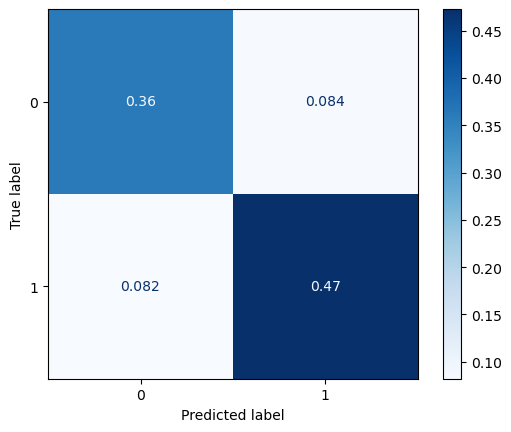

In [ ]:
model_lr = LogisticRegression(random_state= 1)
model_lr, roc_auc_lr, f1_score_lr = model_func(model_lr, X_train, y_train, X_test, y_test)

## Apply gridsearch to logistic regression

In [ ]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear','newton-cg'],
      'max_iter':[1000,5000,10000,100000],
      'tol':[0.0001,0.000001]}

In [ ]:
model = LogisticRegression(random_state= 1)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, n_jobs=-1, scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [1000, 5000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=1000, penalty='none', random_state=1)


In [ ]:
model_lr_grid = grid_search.best_estimator_

Precision: 0.8490
Recall: 0.8520
Accuracy Score: 0.8338
F-1 Score: 0.8505
ROC_AUC = 0.8316
              precision    recall  f1-score   support

           0     0.8148    0.8112    0.8130      8405
           1     0.8490    0.8520    0.8505     10471

    accuracy                         0.8338     18876
   macro avg     0.8319    0.8316    0.8317     18876
weighted avg     0.8337    0.8338    0.8338     18876



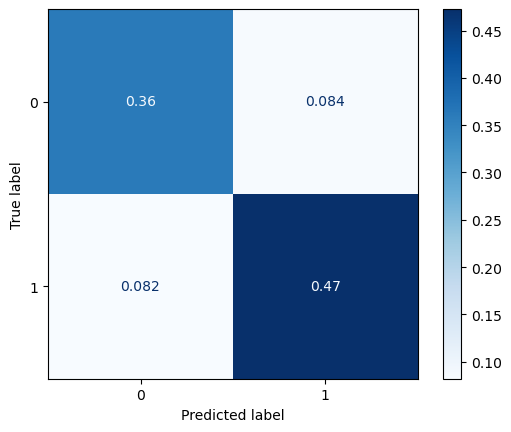

In [ ]:
model_lr_grid, roc_auc_lr_grid, f1_score_lr_grid = model_func(model_lr_grid, X_train, y_train, X_test, y_test)

## Linear SVM

In [ ]:
model_svm = SVC(kernel='linear')

Precision: 0.8593
Recall: 0.8504
Accuracy Score: 0.8398
F-1 Score: 0.8549
ROC_AUC = 0.8385
              precision    recall  f1-score   support

           0     0.8160    0.8265    0.8213      8405
           1     0.8593    0.8504    0.8549     10471

    accuracy                         0.8398     18876
   macro avg     0.8377    0.8385    0.8381     18876
weighted avg     0.8400    0.8398    0.8399     18876



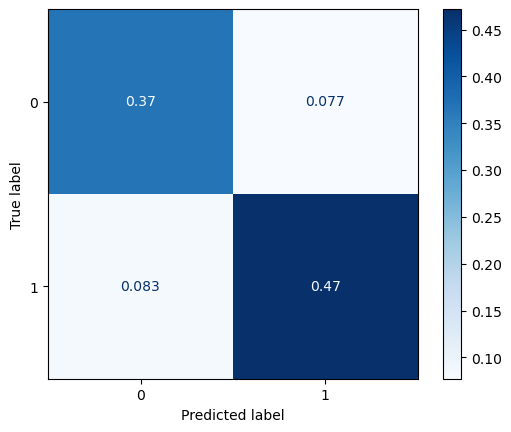

In [ ]:
model_svm, roc_auc_svm, f1_score_svm = model_func(model_svm, X_train, y_train, X_test, y_test)

## Decision tree classifier

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=4)

Precision: 0.9014
Recall: 0.8608
Accuracy Score: 0.8705
F-1 Score: 0.8806
ROC_AUC = 0.8717
              precision    recall  f1-score   support

           0     0.8358    0.8827    0.8586      8405
           1     0.9014    0.8608    0.8806     10471

    accuracy                         0.8705     18876
   macro avg     0.8686    0.8717    0.8696     18876
weighted avg     0.8722    0.8705    0.8708     18876



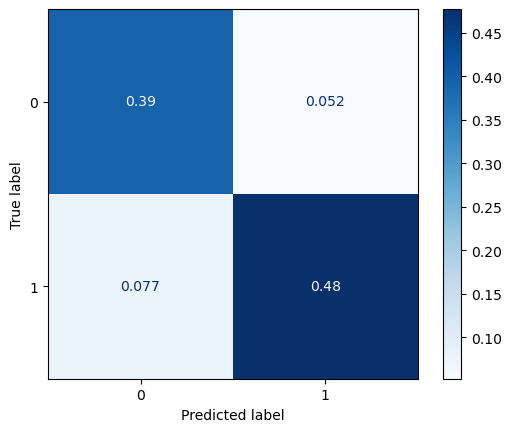

In [ ]:
model_dt, roc_auc_dt, f1_score_dt = model_func(model_dt, X_train, y_train, X_test, y_test)

In [ ]:
dt = DecisionTreeClassifier(max_depth=4)
param = {
        'max_depth': [2, 4, 7, 8, 18, 12],
        'min_samples_split' : [1, 5, 8, 9],
        'criterion' : ['gini', 'entropy']
        }
model_dt_grid = GridSearchCV(dt, param, n_jobs = -1)
model_dt_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 7, 8, 18, 12],
                         'min_samples_split': [1, 5, 8, 9]})

In [ ]:
# Examine the best model

print("Best params: ", model_dt_grid.best_params_)
print("Best estimator: ", model_dt_grid.best_estimator_)
print("Best score: ", model_dt_grid.best_score_)

Best params:  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 9}
Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_split=9)
Best score:  0.9346648759281324


In [ ]:
model_dt_grid = DecisionTreeClassifier(max_depth=18, criterion='entropy', min_samples_split=9)

Precision: 0.9503
Recall: 0.9355
Accuracy Score: 0.9371
F-1 Score: 0.9429
ROC_AUC = 0.9373
              precision    recall  f1-score   support

           0     0.9212    0.9391    0.9301      8405
           1     0.9503    0.9355    0.9429     10471

    accuracy                         0.9371     18876
   macro avg     0.9358    0.9373    0.9365     18876
weighted avg     0.9374    0.9371    0.9372     18876



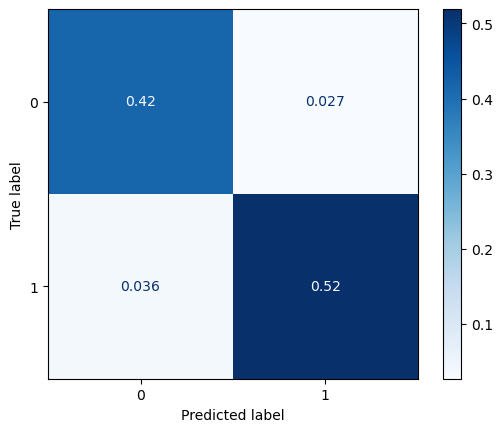

In [ ]:
model_dt_grid, roc_auc_dt_grid, f1_score_dt_grid = model_func(model_dt_grid, X_train, y_train, X_test, y_test)

## Random forest classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model_rf = RandomForestClassifier(random_state=42)

Precision: 0.9623
Recall: 0.9508
Accuracy Score: 0.9521
F-1 Score: 0.9565
ROC_AUC = 0.9522
              precision    recall  f1-score   support

           0     0.9396    0.9536    0.9466      8405
           1     0.9623    0.9508    0.9565     10471

    accuracy                         0.9521     18876
   macro avg     0.9510    0.9522    0.9515     18876
weighted avg     0.9522    0.9521    0.9521     18876



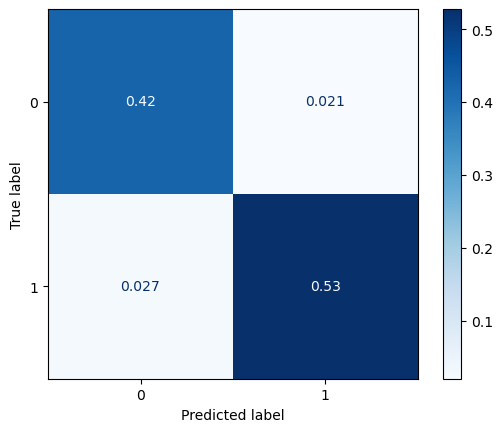

In [ ]:
model_rf, roc_auc_rf, f1_score_rf = model_func(model_rf, X_train, y_train, X_test, y_test)

## Best model

In [ ]:
df_test1 = df_test_num.copy()
prediction = model_rf.predict(df_test_main)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv("prediction_results3.csv")

In [ ]:
import time
start = time.time()

param = {    
         'n_estimators' : [50, 100, 200, 500, 1000],
         'max_depth' : [4, 5, 6, 8, 10, 15],
         'criterion' : ['gini', 'entropy'],
         'min_samples_split' : [4, 7, 3, 9],
         'max_features':['auto', 'sqrt', 'log2']
        }

rf = RandomForestClassifier(n_estimators = 50)

model_rs = RandomizedSearchCV(rf, param_distributions=param,
                        n_iter=30, scoring="accuracy", random_state=42,
                        n_jobs=-1, cv=10, return_train_score=True)

model_rs.fit(X_train, y_train)

end = time.time()

elapsed = end - start

print('Time elapsed: ', elapsed)

Time elapsed:  2370.382010936737


In [ ]:
print("Best params: ", model_rs.best_params_)
print("Best estimator: ", model_rs.best_estimator_)
print("Best score: ", model_rs.best_score_)

Best params:  {'n_estimators': 500, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}
Best estimator:  RandomForestClassifier(max_depth=15, min_samples_split=4, n_estimators=500)
Best score:  0.9446511623827728


Precision: 0.9544
Recall: 0.9486
Accuracy Score: 0.9463
F-1 Score: 0.9515
ROC_AUC = 0.9461
              precision    recall  f1-score   support

           0     0.9365    0.9435    0.9400      8405
           1     0.9544    0.9486    0.9515     10471

    accuracy                         0.9463     18876
   macro avg     0.9454    0.9461    0.9457     18876
weighted avg     0.9464    0.9463    0.9464     18876



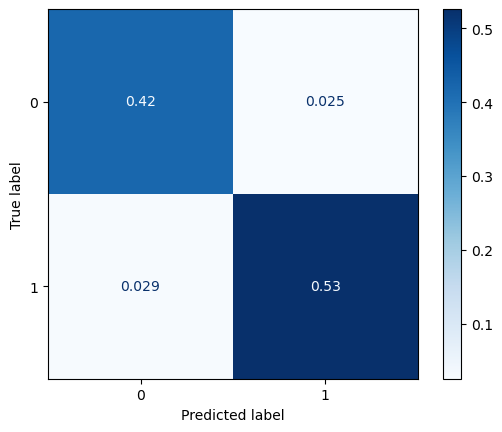

In [ ]:
model_rs = model_rs.best_estimator_
model_rs, roc_auc_rs, f1_score_rs = model_func(model_rs, X_train, y_train, X_test, y_test)

In [ ]:
ts = model_rs.predict(df_test_main)

In [ ]:
ts

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

## Gradient boosting classifiers

In [ ]:
!{sys.executable} -m pip install xgboost

     --------------------------------------- 89.1/89.1 MB 1.2 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier

Precision: 0.9610
Recall: 0.9552
Accuracy Score: 0.9536
F-1 Score: 0.9581
ROC_AUC = 0.9535
              precision    recall  f1-score   support

           0     0.9446    0.9517    0.9481      8405
           1     0.9610    0.9552    0.9581     10471

    accuracy                         0.9536     18876
   macro avg     0.9528    0.9535    0.9531     18876
weighted avg     0.9537    0.9536    0.9537     18876



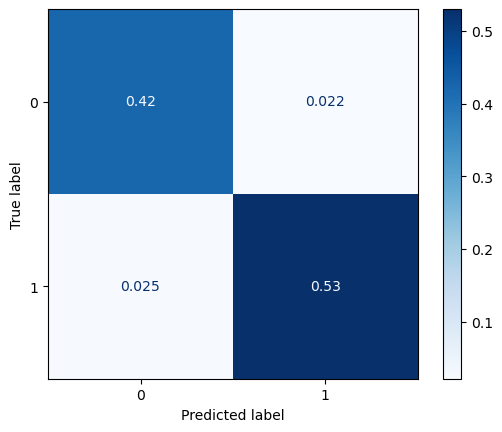

In [ ]:
model_xgbc = XGBClassifier()
model_xgbc, roc_auc_xgbc, f1_score_xgbc = model_func(model_xgbc, X_train, y_train, X_test, y_test)

## Best model

In [ ]:
df_test1 = df_test_num.copy()
prediction = model_xgbc.predict(df_test_main)
df_test1['Overall_Experience'] = prediction
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv("prediction_results4_xg.csv")

In [ ]:
df_test_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35602 non-null  float64
 1   Travel_Distance          35602 non-null  float64
 2   Departure_Delay_in_Mins  35602 non-null  float64
 3   Arrival_Delay_in_Mins    35602 non-null  float64
 4   Seat_Comfort             35602 non-null  int64  
 5   Seat_Class               35602 non-null  int64  
 6   Arrival_Time_Convenient  35602 non-null  int64  
 7   Catering                 35602 non-null  int64  
 8   Platform_Location        35602 non-null  int64  
 9   Onboard_Wifi_Service     35602 non-null  int64  
 10  Onboard_Entertainment    35602 non-null  int64  
 11  Online_Support           35602 non-null  int64  
 12  Ease_of_Online_Booking   35602 non-null  int64  
 13  Onboard_Service          35602 non-null  int64  
 14  Legroom               

In [ ]:
res = pd.DataFrame(xgbc_predictions)
res.index = X_test.index # its important for comparison
res.columns = ["prediction"]


In [ ]:
X_test.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35221,1.295505,1.688898,-0.226555,-0.311340,0,1,1,1,2,0,...,5,3,4,2,2,2,2,3,2,2
12640,-1.483392,-0.030048,-0.331462,-0.389511,0,1,1,1,2,0,...,2,2,2,2,3,2,4,3,3,2
53656,1.890983,-1.528167,-0.383916,-0.076828,0,1,1,0,2,0,...,4,3,4,2,4,2,2,3,2,2
1165,-0.027779,-0.180833,-0.383916,-0.389511,0,1,0,0,2,0,...,5,5,5,5,5,3,4,5,3,5
68981,1.295505,0.633405,7.169438,6.880375,1,1,0,0,2,1,...,2,4,2,2,1,4,3,2,1,2


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75503 entries, 27104 to 15795
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      75503 non-null  float64
 1   Travel_Distance          75503 non-null  float64
 2   Departure_Delay_in_Mins  75503 non-null  float64
 3   Arrival_Delay_in_Mins    75503 non-null  float64
 4   Gender                   75503 non-null  int64  
 5   Customer_Type            75503 non-null  int64  
 6   Type_Travel              75503 non-null  int64  
 7   Travel_Class             75503 non-null  int64  
 8   Seat_Comfort             75503 non-null  int64  
 9   Seat_Class               75503 non-null  int64  
 10  Arrival_Time_Convenient  75503 non-null  int64  
 11  Catering                 75503 non-null  int64  
 12  Platform_Location        75503 non-null  int64  
 13  Onboard_Wifi_Service     75503 non-null  int64  
 14  Onboard_Entertainm

In [ ]:
!{sys.executable} -m pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 3.4 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb

Precision: 0.9591
Recall: 0.9515
Accuracy Score: 0.9506
F-1 Score: 0.9553
ROC_AUC = 0.9505
              precision    recall  f1-score   support

           0     0.9402    0.9494    0.9448      8405
           1     0.9591    0.9515    0.9553     10471

    accuracy                         0.9506     18876
   macro avg     0.9496    0.9505    0.9500     18876
weighted avg     0.9507    0.9506    0.9506     18876



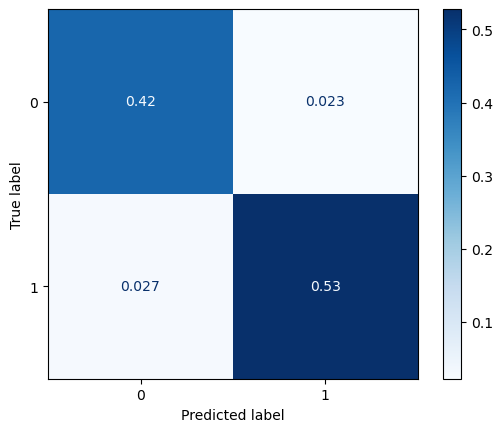

In [ ]:
model_lgb = lgb.LGBMClassifier()
model_lgb, roc_auc_lgb, f1_score_lgb = model_func(model_lgb, X_train, y_train, X_test, y_test)

## ANN models

In [ ]:
!{sys.executable} -m pip install tensorflow

     ----------------------------------- 455.9/455.9 MB 926.7 kB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 1.4 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     --------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ------------------------------------- 124.6/124.6 kB 1.8 MB/s eta 0:00:00
     --------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 2.0 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 1.8 MB/s eta 0:00:00
     --------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 1.3 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 k

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)

In [ ]:
# Initializing the ANN
model = Sequential()
model.add(Dense(activation = 'relu', input_dim = 23, units=64))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1888/1888 [==============================] - 14s 7ms/step - loss: 0.4614 - accuracy: 0.7801 - val_loss: 0.3908 - val_accuracy: 0.8198
Epoch 2/50
1888/1888 [==============================] - 14s 7ms/step - loss: 0.3447 - accuracy: 0.8458 - val_loss: 0.3621 - val_accuracy: 0.8401
Epoch 3/50
1888/1888 [==============================] - 14s 7ms/step - loss: 0.2934 - accuracy: 0.8709 - val_loss: 0.2658 - val_accuracy: 0.8860
Epoch 4/50
1888/1888 [==============================] - 14s 7ms/step - loss: 0.2620 - accuracy: 0.8867 - val_loss: 0.2437 - val_accuracy: 0.8962
Epoch 5/50
1888/1888 [==============================] - 14s 7ms/step - loss: 0.2429 - accuracy: 0.8960 - val_loss: 0.2567 - val_accuracy: 0.8941
Epoch 6/50
1888/1888 [==============================] - 14s 7ms/step - loss: 0.2308 - accuracy: 0.9009 - val_loss: 0.2125 - val_accuracy: 0.9099
Epoch 7/50
1888/1888 [==============================] - 15s 8ms/step - loss: 0.2215 - accuracy: 0.9057 - val_loss: 0.2034 - val_ac

590/590 [==============================] - 3s 4ms/step - loss: 0.1512 - accuracy: 0.9374


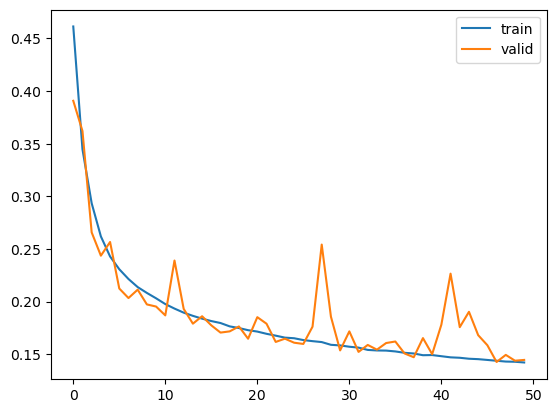

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [ ]:
y_pred=model.predict(X_test)

590/590 [==============================] - 2s 4ms/step


In [ ]:
results

[0.15122397243976593, 0.9373807907104492]

In [ ]:
y_test

35221    0
12640    0
53656    0
1165     1
68981    0
        ..
82976    0
46860    0
10833    1
59203    1
8490     1
Name: Overall_Experience, Length: 18876, dtype: int64